In [2]:
protein <- read.table("protein.txt", sep = "\t", header = T)

In [3]:
summary(protein)

           Country      RedMeat         WhiteMeat           Eggs      
 Albania       : 1   Min.   : 4.400   Min.   : 1.400   Min.   :0.500  
 Austria       : 1   1st Qu.: 7.800   1st Qu.: 4.900   1st Qu.:2.700  
 Belgium       : 1   Median : 9.500   Median : 7.800   Median :2.900  
 Bulgaria      : 1   Mean   : 9.828   Mean   : 7.896   Mean   :2.936  
 Czechoslovakia: 1   3rd Qu.:10.600   3rd Qu.:10.800   3rd Qu.:3.700  
 Denmark       : 1   Max.   :18.000   Max.   :14.000   Max.   :4.700  
 (Other)       :19                                                    
      Milk            Fish           Cereals          Starch     
 Min.   : 4.90   Min.   : 0.200   Min.   :18.60   Min.   :0.600  
 1st Qu.:11.10   1st Qu.: 2.100   1st Qu.:24.30   1st Qu.:3.100  
 Median :17.60   Median : 3.400   Median :28.00   Median :4.700  
 Mean   :17.11   Mean   : 4.284   Mean   :32.25   Mean   :4.276  
 3rd Qu.:23.30   3rd Qu.: 5.800   3rd Qu.:40.10   3rd Qu.:5.700  
 Max.   :33.70   Max.   :14.200   Ma

#   Use all the columns except the first (Country). 

In [4]:
var.to.use <- colnames(protein)[-1]

### Scale the data columns to be zero mean and unit variance.

In [6]:
pmat <- scale(protein[,var.to.use])

In [7]:
head(pmat)

RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0.08126490,-1.7584889,-2.1796385,-1.15573814,-1.20028213,0.9159176,-2.2495772,1.2227536,-1.35040507
-0.27725673,1.6523731,1.2204544,0.39237676,-0.64187467,-0.3870690,-0.4136872,-0.8923886,0.09091397
1.09707621,0.3800675,1.0415022,0.05460623,0.06348211,-0.5146342,0.8714358,-0.4895043,-0.07539207
-0.60590157,-0.5132535,-1.1954011,-1.24018077,-0.90638347,2.2280161,-1.9435955,0.3162641,0.03547862
-0.03824231,0.9485445,-0.1216875,-0.64908235,-0.67126454,0.1869740,0.4430614,-0.9931096,-0.07539207
0.23064892,0.7861225,0.6835976,1.11013912,1.65053488,-0.9428885,0.3206688,-1.1945517,-0.96235764


#### Store the centers and standard deviations of the original data,so you can "unscale" it later.

In [8]:
pcent <- attr(pmat, "Scaled:center")
pscale <- attr(pmat, "Scaled:scale")

# Hierarchial Clustering

##### Distance matrix

In [9]:
d <- dist(pmat, method = 'euclidean')

In [10]:
pfit <- hclust(d, method = 'ward')

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


##### Dendogram

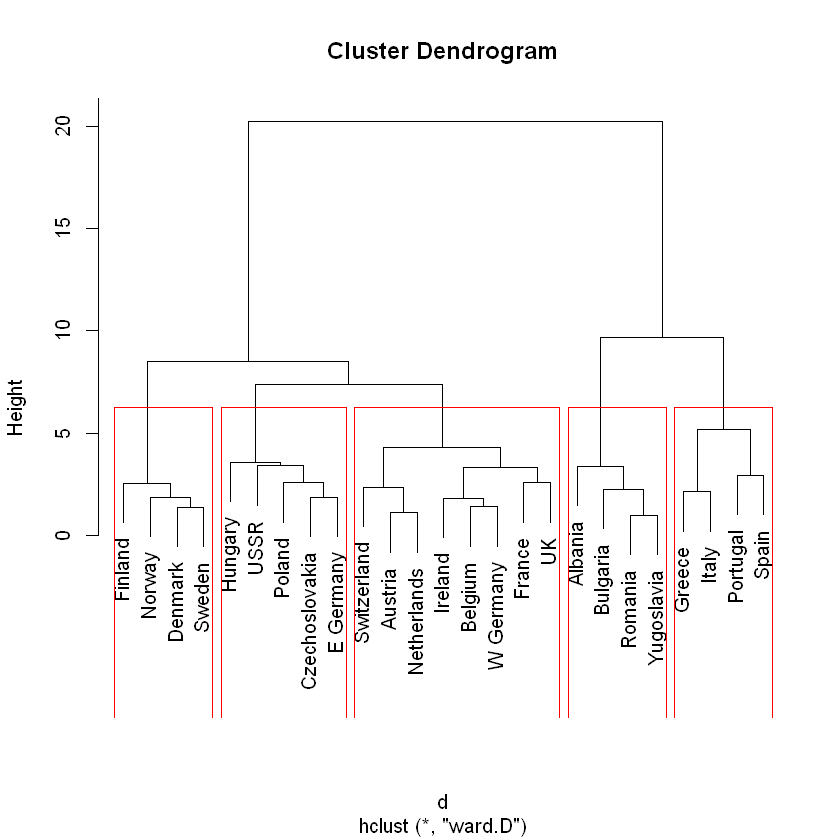

In [13]:
plot(pfit, labels = protein$Country)
rect.hclust(pfit, k = 5)

In [14]:
print_clusters <- function(labels, k) {             
  for(i in 1:k) {
    print(paste("cluster", i))
    print(protein[labels==i,c("Country","RedMeat","Fish","Fr.Veg")])
  }
}

##### Get cluster labels

In [15]:
groups <- cutree(pfit, k = 5)

In [16]:
print_clusters(groups, 5)

[1] "cluster 1"
      Country RedMeat Fish Fr.Veg
1     Albania    10.1  0.2    1.7
4    Bulgaria     7.8  1.2    4.2
18    Romania     6.2  1.0    2.8
25 Yugoslavia     4.4  0.6    3.2
[1] "cluster 2"
       Country RedMeat Fish Fr.Veg
2      Austria     8.9  2.1    4.3
3      Belgium    13.5  4.5    4.0
9       France    18.0  5.7    6.5
12     Ireland    13.9  2.2    2.9
14 Netherlands     9.5  2.5    3.7
21 Switzerland    13.1  2.3    4.9
22          UK    17.4  4.3    3.3
24   W Germany    11.4  3.4    3.8
[1] "cluster 3"
          Country RedMeat Fish Fr.Veg
5  Czechoslovakia     9.7  2.0    4.0
7       E Germany     8.4  5.4    3.6
11        Hungary     5.3  0.3    4.2
16         Poland     6.9  3.0    6.6
23           USSR     9.3  3.0    2.9
[1] "cluster 4"
   Country RedMeat Fish Fr.Veg
6  Denmark    10.6  9.9    2.4
8  Finland     9.5  5.8    1.4
15  Norway     9.4  9.7    2.7
20  Sweden     9.9  7.5    2.0
[1] "cluster 5"
    Country RedMeat Fish Fr.Veg
10   Greece    10.2 

# clusterboot()

In [17]:
library(fpc)

In [18]:
kbest.p <- 5

In [21]:
cboot.hclust <- clusterboot(pmat, clustermethod = hclustCBI, method = 'ward', k = kbest.p)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 1 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 2 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 3 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 4 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 5 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 6 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 7 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 8 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 9 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 10 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 11 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 12 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 13 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 14 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 15 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 16 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 17 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 18 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 19 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 20 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 21 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 22 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 23 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 24 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 25 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 26 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 27 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 28 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 29 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 30 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 31 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 32 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 33 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 34 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 35 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 36 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 37 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 38 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 39 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 40 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 41 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 42 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 43 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 44 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 45 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 46 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 47 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 48 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 49 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 50 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 51 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 52 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 53 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 54 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 55 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 56 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 57 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 58 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 59 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 60 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 61 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 62 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 63 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 64 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 65 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 66 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 67 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 68 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 69 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 70 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 71 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 72 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 73 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 74 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 75 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 76 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 77 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 78 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 79 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 80 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 81 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 82 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 83 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 84 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 85 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 86 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 87 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 88 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 89 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 90 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 91 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 92 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 93 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 94 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 95 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 96 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 97 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 98 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 99 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


boot 100 


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


In [22]:
groups <- cboot.hclust$result$partition

In [23]:
print_clusters(groups, kbest.p)

[1] "cluster 1"
      Country RedMeat Fish Fr.Veg
1     Albania    10.1  0.2    1.7
4    Bulgaria     7.8  1.2    4.2
18    Romania     6.2  1.0    2.8
25 Yugoslavia     4.4  0.6    3.2
[1] "cluster 2"
       Country RedMeat Fish Fr.Veg
2      Austria     8.9  2.1    4.3
3      Belgium    13.5  4.5    4.0
9       France    18.0  5.7    6.5
12     Ireland    13.9  2.2    2.9
14 Netherlands     9.5  2.5    3.7
21 Switzerland    13.1  2.3    4.9
22          UK    17.4  4.3    3.3
24   W Germany    11.4  3.4    3.8
[1] "cluster 3"
          Country RedMeat Fish Fr.Veg
5  Czechoslovakia     9.7  2.0    4.0
7       E Germany     8.4  5.4    3.6
11        Hungary     5.3  0.3    4.2
16         Poland     6.9  3.0    6.6
23           USSR     9.3  3.0    2.9
[1] "cluster 4"
   Country RedMeat Fish Fr.Veg
6  Denmark    10.6  9.9    2.4
8  Finland     9.5  5.8    1.4
15  Norway     9.4  9.7    2.7
20  Sweden     9.9  7.5    2.0
[1] "cluster 5"
    Country RedMeat Fish Fr.Veg
10   Greece    10.2 

In [24]:
cboot.hclust$bootmean
# The vector of cluster stabilities. 
# Values close to 1 indicate stable clusters

[1] 0.8135000 0.7972698 0.6794286 0.8948571 0.8190000

In [25]:
cboot.hclust$bootbrd

# The count of how many times each cluster was 
# dissolved. By default clusterboot() runs 100 
# bootstrap iterations. 
# Clusters that are dissolved often are unstable. 

[1] 20 18 35 13 24